In [8]:
##importing required libraries
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
import random 

In [3]:
##import the dataset
faces = pd.read_csv('../data/fer2013/fer2013.csv')
faces.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
faces.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [6]:
faces.nunique()


emotion        7
pixels     34034
Usage          3
dtype: int64

## Dataset Description
The given dataset has 3 features which are:
- Emotion: Label encoded feature with 7 different emotions.
    - 0: Angry
    - 1: Digust
    - 2: Fear
    - 3: Happy
    - 4: Sad
    - 5: Surprise
    - 6: Neutral 
- Pixels: This is a flattened array of pixels of a black and white 48x48 pixels face picture in string format
- Usage: Label for the picture whether to use them as training or testing or validation


In [14]:
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotion_counts = faces['emotion'].value_counts().reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

,emotion,number
0,Happy,8989
1,Neutral,6198
2,Sad,6077
3,Fear,5121
4,Angry,4953
5,Surprise,4002
6,Digust,547


It seems the data is not balanced properly as some classes like disgust is way sparse than the class happy. WE can use some augmentation techniques to handle the imbalance or even SMOTE during training

In [9]:
##Lets check some of the faces
faces.sample(n=10)

,emotion,pixels,Usage
29464,3,233 181 135 60 52 51 26 25 18 28 32 36 28 21 1...,PublicTest
15896,6,21 13 14 11 10 8 3 5 4 1 0 13 13 11 16 15 21 1...,Training
20344,6,30 30 30 30 32 33 41 43 30 64 90 103 124 145 1...,Training
33909,2,5 6 6 6 6 7 7 7 8 8 9 11 13 15 15 15 15 17 24 ...,PrivateTest
24019,4,76 77 85 90 95 107 146 182 185 196 174 138 106...,Training
8771,2,244 191 123 99 106 116 123 127 137 148 157 164...,Training
25473,5,230 230 229 228 228 228 228 230 227 226 224 16...,Training
9675,0,0 0 0 0 0 0 0 0 0 0 0 0 1 23 48 50 52 51 54 54...,Training
10876,3,19 35 14 22 24 17 8 16 49 50 21 15 14 21 72 86...,Training
23821,4,187 118 104 136 141 150 160 164 168 171 176 17...,Training


In [11]:
#Lets create a funtion to convert the pixel values to array so that we can plot it
type(faces['pixels'][0])

str

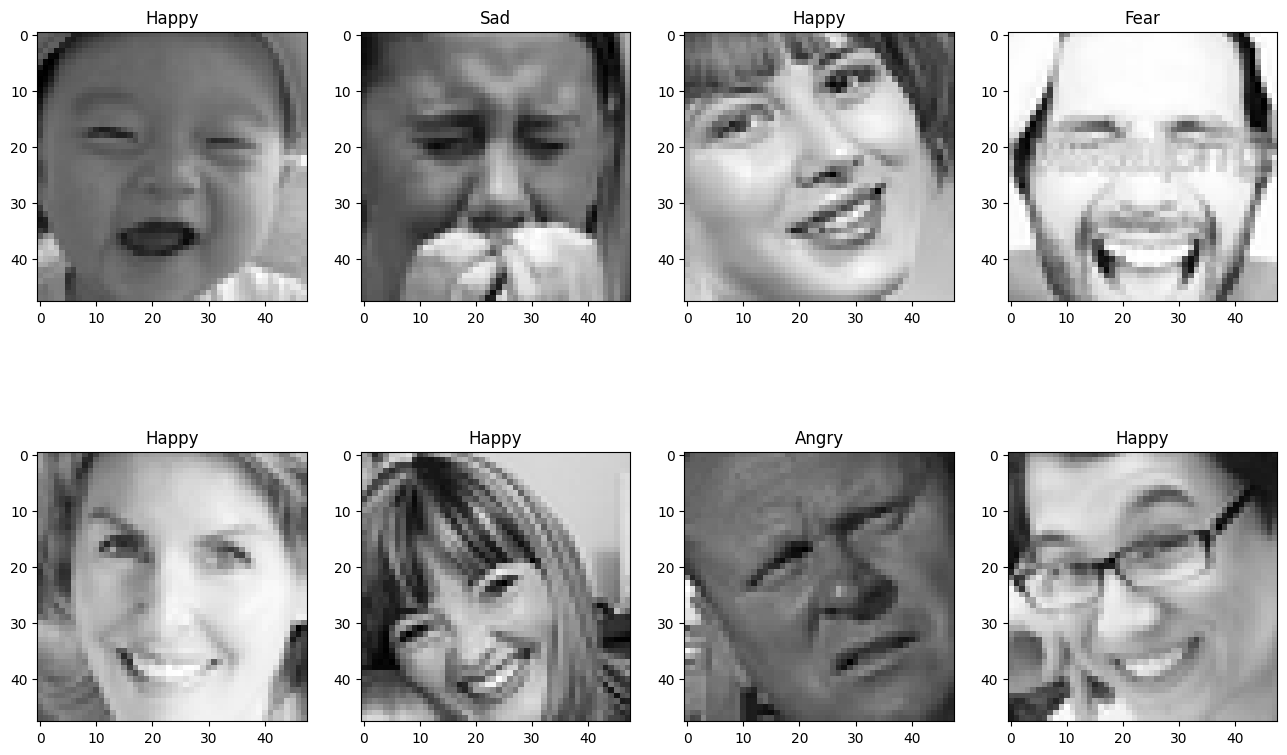

In [40]:
def get_image(row):
    pixels = row['pixels']
    emotion = emotion_map[row['emotion']]
    img = np.array(pixels.split(),dtype =float) 
    #this will give a list from the string for instance [233,181,135]. 
    #pixels.split gives a list and np.array converts the list to array
    img = img.reshape(48,48) # reshape the 1d array to 2d array of dimensions 48x48
    return (img.astype(np.uint8), emotion) #return tuple of img with required datatype and emotion label

samples = faces.sample(n = 8).reset_index() #getting 8 random
plt.figure(0, figsize=(20,10))
for index, row in samples.iterrows():
    img = get_image(row)
    plt.subplot(2,4,index+1)
    plt.imshow(img[0],cmap='gray')
    plt.title(img[1])

plt.show()  